In [33]:
import Stellar_sim_funcs as SSF
import importlib
importlib.reload(SSF)

import numpy as np

import matplotlib.pyplot as plt

import scipy.constants as const

import jaxsp as jsp

G = const.G

from scipy.interpolate import interp1d

from jaxsp.constants import h, om, hbar, Msun, GN, c, m22

G = GN.value * (u.from_cm**3) / (u.from_g * u.from_s**2)

m22 = 1
u = jsp.set_schroedinger_units(m22)

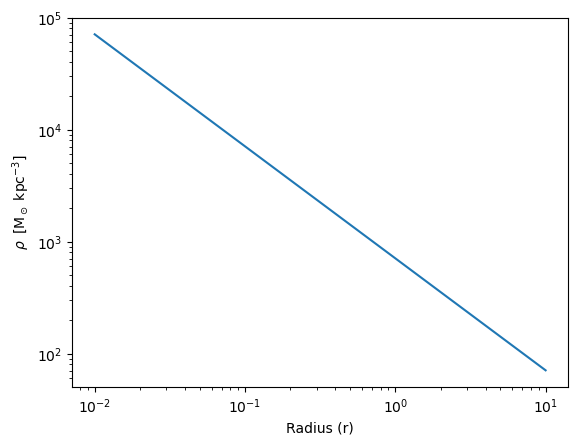

In [24]:
r_min = 0.01 * u.from_Kpc
r_max = 10 * u.from_Kpc


r_log = np.logspace(np.log10(r_min), np.log10(r_max), 10000)

r_lin = np.linspace(r_min, r_max, 1000)

r = r_log

rho_0 = 1.0  # Example central density
rho = rho_0 / (r)

plt.plot(r * u.to_Kpc, rho * u.to_Msun / u.to_Kpc**3)
plt.xlabel(r'Radius (r)')
plt.ylabel(r"$\rho \;\;\mathrm{[M_\odot\;kpc^{-3}]}$")
plt.xscale('log')
plt.yscale('log')
plt.show()



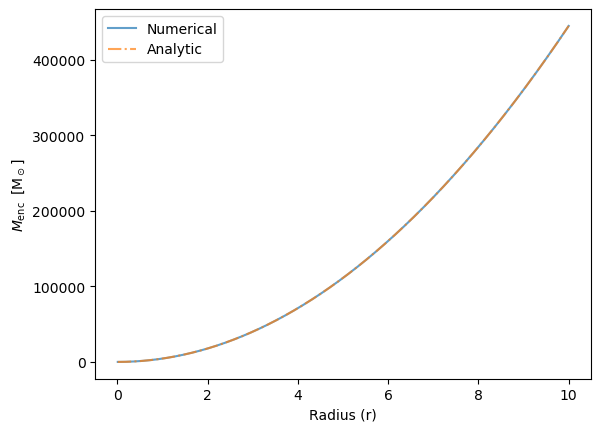

[0.00000000e+00 1.92287971e-09 3.84841808e-09 ... 1.38688716e+00
 1.38880473e+00 1.39072495e+00]
[9.97887182e-22 1.92287971e-09 3.84841808e-09 ... 1.38688716e+00
 1.38880473e+00 1.39072495e+00]


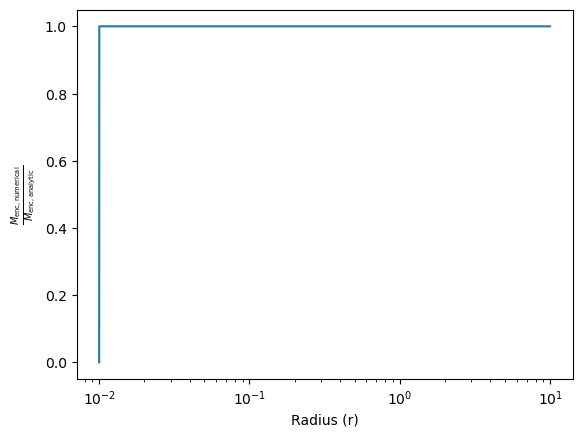

In [25]:
M_enc = SSF.Enclosed_mass(r, rho)


plt.plot(r * u.to_Kpc, M_enc * u.to_Msun, label='Numerical', alpha=0.7)
plt.xlabel(r'Radius (r)')
plt.ylabel(r"$M_{\mathrm{enc}} \;\;\mathrm{[M_\odot]}$")
plt.plot(r * u.to_Kpc, 2 * np.pi * rho_0 * r**2 * u.to_Msun, '-.', label='Analytic', alpha=0.7)
plt.legend()
plt.show()

M_enc_known = 2 * np.pi * rho_0 * (r**2 - r_min**2)

print(M_enc)
print(M_enc_known)

plt.plot(r * u.to_Kpc, M_enc / M_enc_known)
plt.xlabel(r'Radius (r)')
plt.ylabel(r"$\frac{M_{\mathrm{enc, numerical}}}{M_{\mathrm{enc, analytic}}}$")
plt.xscale('log')
plt.show()


[-2.34764209e-01 -2.34764209e-01 -2.34764209e-01 ... -3.24796134e-04
 -1.62454163e-04  0.00000000e+00]
[-2.34764209e-01 -2.34764209e-01 -2.34764209e-01 ... -3.24796134e-04
 -1.62454163e-04  0.00000000e+00]


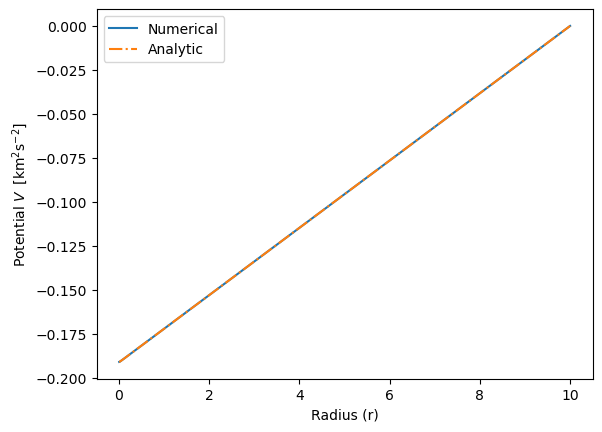

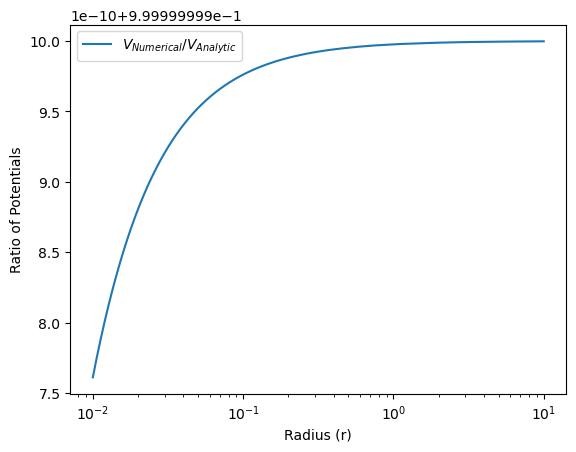

In [26]:
V = SSF.Obtain_pot(r_min, r_max, rho, r)

plt.plot(r * u.to_Kpc, V * u.to_kms**2, label='Numerical')
plt.ylabel(r"Potential $V \;\;\mathrm{[km^2s^{-2}]}$")
plt.xlabel(r'Radius (r)')
#plt.xscale('log')

G = GN.value * (u.from_cm**3) / (u.from_g * u.from_s**2)

v_known = 2 * np.pi * rho_0 * G * (r - r_max + r_min**2 / r - r_min**2/r_max)

print(v_known)
print(V)


plt.plot(r * u.to_Kpc, v_known * u.to_kms**2, '-.', label='Analytic')
plt.legend()
plt.show()

plt.plot(r * u.to_Kpc, V/v_known, label=r'$V_{Numerical} / V_{Analytic}$')
plt.ylabel(r"Ratio of Potentials")
plt.xlabel(r'Radius (r)')
plt.legend()
plt.xscale('log')
plt.show()



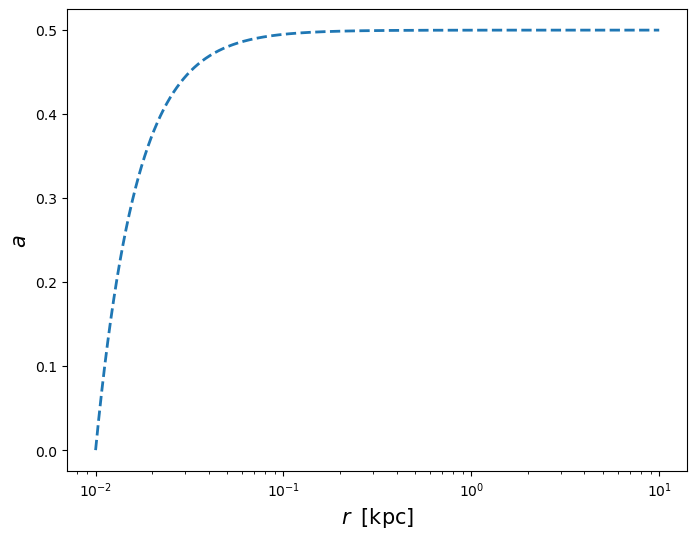

0.4999993827160495


In [35]:
r_orbit = 9 * u.from_Kpc

init_pos = np.array([r_orbit, 0, 0]) #Starting as position (r_vir, 0, 0) = (x, y, z)

acc = G * M_enc / r**2

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(r * u.to_Kpc, acc, label='enclosed mass acceleration', lw=2, ls='--')
ax.set_ylabel(r"$a$", fontsize = 15)
ax.set_xlabel(r"$r \;\;\mathrm{[kpc]}$", fontsize = 15)
ax.set_xscale('log')
plt.show()


acc = interp1d(r, acc, kind='cubic', fill_value="extrapolate")
print(acc(r_orbit))


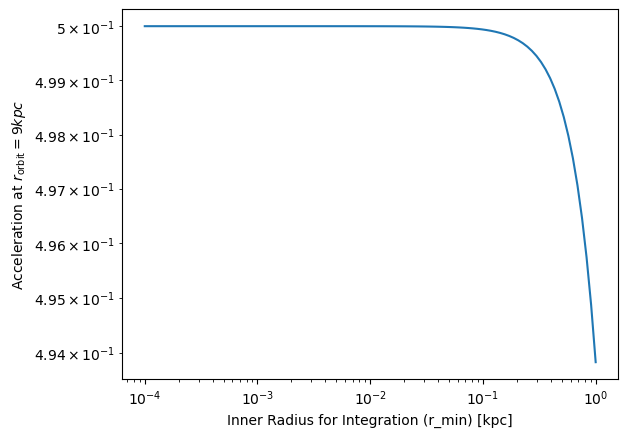

In [53]:
r_min = np.logspace(np.log10(0.0001 * u.from_Kpc), np.log10(1 * u.from_Kpc), 100)
r_max = 10
r_orbit = 9 * u.from_Kpc

accs = []


for i in r_min:
    
    r = np.logspace(np.log10(i), np.log10(r_max), 10000)

    rho = rho_0 / (r)

    acc = SSF.Find_acc_mag_from_rho(r, rho, r_orbit)

    accs.append(acc)


plt.plot(r_min * u.to_Kpc, np.array(accs))
plt.xlabel(r'Inner Radius for Integration (r_min) [kpc]')
plt.ylabel(r"Acceleration at $r_{\mathrm{orbit}} = 9 kpc$")
plt.xscale('log')
plt.yscale('log')
plt.show()

